In [1]:
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../experiments")


from experiment_information import *
from experiment_setup import *
from data import *
from helpers import *
from data_loading import *
import matplotlib.pyplot as plt



import pandas as pd
import numpy as np
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)


import numpy as np
import re
%load_ext autoreload
%autoreload 2



This code assumes that you have defined and run an experiment before using `define_experiment.ipynb` in the `experiments` folder.

In [2]:
df_experiments, df_state_evolution, df_erm = obtain_dataframes(logger)
df_experiments.head(5)

Current code version, 113


,experiment_id,experiment_name,duration,problem_types,code_version,date,state_evolution_repetitions,erm_repetitions,alphas,epsilons,...,taus,ps,dp,d,experiment_type,completed,data_model_types,data_model_names,data_model_descriptions,gamma_fair_error
29,7b24b808-04ae-43fc-b7aa-915d8f5978eb,OptimalDefense,12.160757,"[""Logistic""]",113,2024-06-17 10:59:59,1,0,[10000.0],"[0.01, 0.0105, 0.011, 0.0115, 0.0121, 0.0126, ...",...,[0.1],null,0.01,1000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel""]","[""KFeaturesModel_TeacherDefense_TeacherAttacke...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
28,5d1a0552-f9e3-4c29-a0ec-6cf0e8026939,OptimalDefense,30.573092,"[""Logistic""]",113,2024-06-17 10:53:17,1,0,[10000.0],"[0.001, 0.0011, 0.0012, 0.0013, 0.0015, 0.0016...",...,[0.1],null,0.01,1000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel""]","[""KFeaturesModel_TeacherDefense_TeacherAttacke...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
27,05d18b6e-be5a-4afb-bfb3-2715b169cf61,OptimalDefense,13.010985,"[""Logistic""]",113,2024-06-17 10:47:14,1,0,[10000.0],"[0.001, 0.0013, 0.0016, 0.0021, 0.0026, 0.0034...",...,[0.1],null,0.01,1000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel""]","[""KFeaturesModel_TeacherDefense_TeacherAttacke...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
25,92d5bf7d-8a48-4c32-88fc-5a08b3565399,FeatureComparisonsTestOneSubspace,337.314815,"[""Logistic""]",113,2024-06-17 10:40:34,1,10,"[0.1585, 0.2154, 0.2929, 0.3981, 0.5412, 0.735...","[0.0, 0.1, 0.2, 0.3]",...,[0.1],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
26,210bbe32-f023-432b-baaa-a7d6cc95e6ae,OptimalDefense,13.547137,"[""Logistic""]",113,2024-06-17 10:39:58,1,0,[10000.0],"[0.001, 0.0013, 0.0016, 0.0021, 0.0026, 0.0034...",...,[0.1],null,0.01,1000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel""]","[""KFeaturesModel_TeacherDefense_TeacherAttacke...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001


In [3]:
experiment_loc = 0

# extract experiment by id "250fa46e-55cb-40d2-b503-11b38823235d"
# experiment_id = "d43ae27a-cf92-4261-a7d1-de5c9717f775"


# extract and print the top experiment_id
experiment_id = df_experiments.iloc[experiment_loc]["experiment_id"]
print(experiment_id)

# extract and print the experiment type
experiment_type = df_experiments.iloc[experiment_loc]["experiment_type"]
print(experiment_type)

# extract and print the data model type and data_model name used
data_model_types = df_experiments.iloc[experiment_loc]["data_model_types"]
# convert it to the enum
data_model_types = [DataModelType[data_model_type] for data_model_type in json.loads(data_model_types)]
data_model_names = [name for name in json.loads(df_experiments.iloc[experiment_loc]["data_model_names"])]
data_model_descriptions = df_experiments.iloc[experiment_loc]["data_model_descriptions"]
for data_model_type in data_model_types:
    print(data_model_type.name)
print(data_model_names)
print(data_model_descriptions)

# print the experiment name
experiment_name = df_experiments.iloc[experiment_loc]["experiment_name"]
print(experiment_name)

# print the experiment problem types
experiment_problem_types = df_experiments.iloc[experiment_loc]["problem_types"]
experiment_problem_types = json.loads(experiment_problem_types)
print(experiment_problem_types)

7b24b808-04ae-43fc-b7aa-915d8f5978eb
Sweep
KFeaturesModel
KFeaturesModel
['KFeaturesModel_TeacherDefense_TeacherAttacked___OptimalDefense', 'KFeaturesModel_OrthogonalDefense_OrthogonalAttacked___OptimalDefense']
["2 Features, Theta Identity, Sigma_upsilon Identity, Sigma_delta Identity", "2 Features, Theta Identity, Sigma_upsilon Identity, Sigma_delta Identity"]
OptimalDefense
['Logistic']


In [4]:
data_model_name_dict = {}
data_model_name_dict["VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["2_VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["VanillaGaussianThetaFirst"] = "Vanilla Gaussian - Teacher 10:1"
data_model_name_dict["VanillaGaussianTimes10"] = "Vanilla Gaussian x10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[10  1]"] = "Strong Weak 5:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[10  1]"] = "Strong Weak 10:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[ 1 10]"] = "Strong Weak 5:1 - Teacher 1:10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[ 1 10]"] = "Strong Weak 10:1 - Teacher 1:10"


In [5]:
state_evolution = df_state_evolution[df_state_evolution["experiment_id" ] == experiment_id]
gd = df_erm[df_erm["experiment_id" ] == experiment_id]
# make the column subspace_overlaps to string
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: str(x))

# create a json colum
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: json.loads(x))
gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: json.loads(x))
from pandas import json_normalize
# normalize the json column
normalized = json_normalize(state_evolution["subspace_overlaps"])
normalized_gd = json_normalize(gd["subspace_overlaps"])



def explode_array_column(row, col):
    return pd.Series(row[col])

# reset the index of the original dataframe
state_evolution = state_evolution.reset_index(drop=True)
gd = gd.reset_index(drop=True)

for col in normalized.columns:
    expanded_cols = normalized.apply(lambda x: explode_array_column(x,col), axis=1)
    col = col[:-1]
    expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
    # reset the index of the expanded columns
    expanded_cols = expanded_cols.reset_index(drop=True)
    state_evolution = pd.concat([state_evolution, expanded_cols], axis=1)

for col in normalized_gd.columns:
    expanded_cols = normalized_gd.apply(lambda x: explode_array_column(x,col), axis=1)
    col = col[:-1]
    expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
    # reset the index of the expanded columns
    expanded_cols = expanded_cols.reset_index(drop=True)

    gd = pd.concat([gd, expanded_cols], axis=1)



/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_2902/3541688095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_2902/3541688095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: json.loads(x))


In [6]:
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: str(x))
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
normalized = json_normalize(state_evolution["subspace_overlaps_ratio"])
# rename the columns of the normalized dataframe
for column in normalized.columns:
    normalized = normalized.rename(columns={column:column+"_ratio"})
# merge the normalized dataframe with the original dataframe
state_evolution = pd.concat([state_evolution, normalized], axis=1)
# drop the original subspace_overlaps column
state_evolution = state_evolution.drop(columns=["subspace_overlaps_ratio"])

gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: str(x))
gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
normalized = json_normalize(gd["subspace_overlaps_ratio"])
# rename the columns of the normalized dataframe
for column in normalized.columns:
    normalized = normalized.rename(columns={column:column+"_ratio"})
# merge the normalized dataframe with the original dataframe
gd = pd.concat([gd, normalized], axis=1)
# drop the original subspace_overlaps column
gd = gd.drop(columns=["subspace_overlaps_ratio"])


In [7]:
# create a column for the difference between the adversarial_generalization_error and the generalization_error for both the state evolution and the erm
state_evolution["difference_adv_gen"] = state_evolution["adversarial_generalization_error"] - state_evolution["generalization_error"]
gd["difference_adv_gen"] = gd["adversarial_generalization_error"] - gd["generalization_error_erm"]


state_evolution["ratio_adv_gen"] = state_evolution["adversarial_generalization_error"] / state_evolution["generalization_error"]
gd["ratio_adv_gen"] = gd["adversarial_generalization_error"] / gd["generalization_error_erm"]

In [8]:
# create a column for the noise contribution
def noise_contribution(rho: float, tau: float) -> float:
    if tau == 0:
        tau = 1e-10
    return 0.5 - np.arctan( np.sqrt( rho / tau**2 ) ) / np.pi

state_evolution["noise_contribution"] = state_evolution.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)
gd["noise_contribution"] = gd.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)

In [9]:
# create a column for the noiseless generalization error without the noise contribution
state_evolution["noiseless_generalization_error"] = state_evolution["generalization_error"] - state_evolution["noise_contribution"]
gd["noiseless_generalization_error_erm"] = gd["generalization_error_erm"] - gd["noise_contribution"]

# create a column for the adversarial noiseless generalization error without the noise contribution
state_evolution["noiseless_adversarial_generalization_error"] = state_evolution["adversarial_generalization_error"] - state_evolution["noise_contribution"]
gd["noiseless_adversarial_generalization_error"] = gd["adversarial_generalization_error"] - gd["noise_contribution"]

In [10]:
# create a column for the A/sqrt(q*N) for both the state evolution and the erm
state_evolution["A_over_sqrt_qN"] = state_evolution["A"] / np.sqrt(state_evolution["q"] * state_evolution["N"])
gd["A_over_sqrt_qN"] = gd["A"] / np.sqrt(gd["q"] * gd["N"])

In [11]:
# create a column for m/sqrt( rho*q - m**2 ) vs A/sqrt(q*N) for both the state evolution and the erm
state_evolution["m_over_sqrt_rhoq_minus_m2"] = state_evolution["m"] / np.sqrt(state_evolution["rho"] * state_evolution["q"] - state_evolution["m"]**2)
gd["m_over_sqrt_rhoq_minus_m2"] = gd["m"] / np.sqrt(gd["rho"] * gd["q"] - gd["m"]**2)


In [12]:
# strip the data_model_name if there is a sequence ___text at the end
def strip_data_model_name(data_model_name):
    return re.sub(r"___.*","",data_model_name)
state_evolution["data_model_name"] = state_evolution["data_model_name"].apply(strip_data_model_name)
gd["data_model_name"] = gd["data_model_name"].apply(strip_data_model_name)

In [13]:
gd = gd.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","data_model_name"]) #,"p_calibration"
state_evolution = state_evolution.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","data_model_name"]) #,"p_calibration"

# drop id, code_version, experiment_id, date, initial_condition, test_against_epsilons, calibrations, abs_tol, min_iter,max_iter,blend_fpe,int_lims,subspace_overlaps
state_evolution = state_evolution.drop(columns=["id","code_version","experiment_id","date","initial_condition","test_against_epsilons","calibrations","abs_tol","min_iter","max_iter","blend_fpe","int_lims","subspace_overlaps","data_model_type","data_model_description"])
# drop id, code_version, experiment_id, test_against_epsilons, date, subspace_overlaps, analytical_calibrations, erm_calibrations, 
gd = gd.drop(columns=["id","code_version","experiment_id","test_against_epsilons","date","subspace_overlaps","analytical_calibrations","erm_calibrations","data_model_type","data_model_description"])

state_evolution.columns = [col+"_state_evolution" for col in state_evolution.columns]
gd.columns = [col+"_erm" for col in gd.columns]

state_evolution = state_evolution.groupby(level=[0,1,2,3,4,5,6]).agg(["mean","std"]) #,4
gd = gd.groupby(level=[0,1,2,3,4,5,6]).agg(["mean","std"]) #,4
df = state_evolution.join(gd, how="outer")
df.sort_index()
df

index_state_evolution  \
                                                                                                                         mean   
alpha   epsilon tau lam  problem_type attack_epsilon data_model_name                                                            
10000.0 0.0100  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefense_OrthogonalAtta...               60634.0   
                                                     KFeaturesModel_TeacherDefense_TeacherAttacked                    60584.0   
        0.0105  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefense_OrthogonalAtta...               60633.0   
                                                     KFeaturesModel_TeacherDefense_TeacherAttacked                    60583.0   
        0.0110  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefense_OrthogonalAtta...               60632.0   
...                                                                                                                       ...   
        0.0910  0.1 0.01 Logistic     0.05           KFeaturesModel_TeacherDefense_TeacherAttacked                    60622.0   
        0.0954  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefense_OrthogonalAtta...               60674.0   
                                                     KFeaturesModel_TeacherDefense_TeacherAttacked                    60621.0   
        0.1000  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefense_OrthogonalAtta...               60675.0   
                                                     KFeaturesModel_TeacherDefense_TeacherAttacked                    60623.0   

                                                                                                             \
                                                                                                        std   
alpha   epsilon tau lam  problem_type attack_epsilon data_model_name                                          
10000.0 0.0100  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefense_OrthogonalAtta... NaN   
                                                     KFeaturesModel_TeacherDefense_TeacherAttacked      NaN   
        0.0105  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefense_OrthogonalAtta... NaN   
                                                     KFeaturesModel_TeacherDefense_TeacherAttacked      NaN   
        0.0110  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefense_OrthogonalAtta... NaN   
...                                                                                                      ..   
        0.0910  0.1 0.01 Logistic     0.05           KFeaturesModel_TeacherDefense_TeacherAttacked      NaN   
        0.0954  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefense_OrthogonalAtta... NaN   
                                                     KFeaturesModel_TeacherDefense_TeacherAttacked      NaN   
        0.1000  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefense_OrthogonalAtta... NaN   
                                                     KFeaturesModel_TeacherDefense_TeacherAttacked      NaN   

                                                                                                        duration_state_evolution  \
                                                                                                                            mean   
alpha   epsilon tau lam  problem_type attack_epsilon data_model_name                                                               
10000.0 0.0100  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefense_OrthogonalAtta...                 2.266044   
                                                     KFeaturesModel_TeacherDefense_TeacherAttacked                      3.333071   
        0.0105  0.1 0.01 Logistic     0.05           KFeaturesModel_OrthogonalDefe

In [14]:
# store the dataframe as a pickle file
# if not os.path.exists("Pickles"):
#     os.makedirs("Pickles")
# if not os.path.exists("Pickles/optimal_defense_high_alpha.pkl"):
#     df.to_pickle("Pickles/optimal_defense_high_alpha.pkl")

In [15]:
# load the dataframe from the pickle file
# df = pd.read_pickle("Pickles/optimal_defense.pkl")

# extracting the data

In [16]:
# extract data_model_names
data_model_names = df.index.get_level_values("data_model_name").unique().tolist()
data_model_names

['KFeaturesModel_OrthogonalDefense_OrthogonalAttacked',
 'KFeaturesModel_TeacherDefense_TeacherAttacked']

In [17]:
attack_epsilons = df.index.get_level_values("attack_epsilon").unique().tolist()

In [18]:
# create a dictionary of dataframes for each data_model_name
dm_dict = {}
for data_model_name in data_model_names:

    attack_eps_df = df.xs(data_model_name, level="data_model_name")

    eps_dict = {}
    
    for attack_epsilon in attack_epsilons:


        eps_df = attack_eps_df.xs(attack_epsilon, level="attack_epsilon")

        epsilons = eps_df.index.get_level_values("epsilon").unique()
        adversarial_error_0 = eps_df["adversarial_generalization_error_state_evolution"]["mean"].values
        generalization_error_0 = eps_df["generalization_error_state_evolution"]["mean"].values
        boundary_error_0 = eps_df["difference_adv_gen_state_evolution"]["mean"].values
        class_preserving = eps_df["fair_adversarial_error_state_evolution"]["mean"].values

        adversarial_error_erm = eps_df["adversarial_generalization_error_erm"]["mean"].values
        generalization_error_erm = eps_df["generalization_error_erm_erm"]["mean"].values
        boundary_error_erm = eps_df["difference_adv_gen_erm"]["mean"].values
        class_preserving_erm = eps_df["fair_adversarial_error_erm"]["mean"].values

        adversarial_error_erm_std = eps_df["adversarial_generalization_error_erm"]["std"].values
        generalization_error_erm_std = eps_df["generalization_error_erm_erm"]["std"].values
        boundary_error_erm_std = eps_df["difference_adv_gen_erm"]["std"].values
        class_preserving_erm_std = eps_df["fair_adversarial_error_erm"]["std"].values

        qs = eps_df["q_state_evolution"]["mean"].values
        ms = eps_df["m_state_evolution"]["mean"].values


        epsilons = np.array(epsilons)
        adversarial_error_0 = np.array(adversarial_error_0)
        generalization_error_0 = np.array(generalization_error_0)
        boundary_error_0 = np.array(boundary_error_0)
        class_preserving = np.array(class_preserving)


        adversarial_error_erm = np.array(adversarial_error_erm)
        generalization_error_erm = np.array(generalization_error_erm)
        boundary_error_erm = np.array(boundary_error_erm)
        class_preserving_erm = np.array(class_preserving_erm)

        adversarial_error_erm_std = np.array(adversarial_error_erm_std)
        generalization_error_erm_std = np.array(generalization_error_erm_std)
        boundary_error_erm_std = np.array(boundary_error_erm_std)
        class_preserving_erm_std = np.array(class_preserving_erm_std)


        qs = np.array(qs)
        ms = np.array(ms)

        eps_0_dict = {}
        eps_0_dict["epsilons"] = epsilons
        eps_0_dict["adversarial_error"] = adversarial_error_0
        eps_0_dict["generalization_error"] = generalization_error_0
        eps_0_dict["boundary_error"] = boundary_error_0
        eps_0_dict["class_preserving"] = class_preserving

        eps_0_dict["adversarial_error_erm"] = adversarial_error_erm
        eps_0_dict["generalization_error_erm"] = generalization_error_erm
        eps_0_dict["boundary_error_erm"] = boundary_error_erm
        eps_0_dict["class_preserving_erm"] = class_preserving_erm

        eps_0_dict["adversarial_error_erm_std"] = adversarial_error_erm_std
        eps_0_dict["generalization_error_erm_std"] = generalization_error_erm_std
        eps_0_dict["boundary_error_erm_std"] = boundary_error_erm_std
        eps_0_dict["class_preserving_erm_std"] = class_preserving_erm_std

        eps_0_dict["qs"] = qs
        eps_0_dict["ms"] = ms

        eps_dict[attack_epsilon] = eps_0_dict


    if data_model_name == "KFeaturesModel_OrthogonalDefense_OrthogonalAttacked":
        name = "Weak"
    elif data_model_name == "KFeaturesModel_TeacherDefense_TeacherAttacked":
        name = "Strong"
    elif data_model_name == "KFeaturesModel_UniformDefense_OrthogonalAttacked":
        name = "Attacking Weak \& Defending Uniform"
    elif data_model_name == "KFeaturesModel_UniformDefense_TeacherAttacked":
        name = "Attacking Strong \& Defending Uniform"
        


    dm_dict[name] = eps_dict


<>:83: SyntaxWarning: invalid escape sequence '\&'
<>:85: SyntaxWarning: invalid escape sequence '\&'
<>:83: SyntaxWarning: invalid escape sequence '\&'
<>:85: SyntaxWarning: invalid escape sequence '\&'
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_2902/888937328.py:83: SyntaxWarning: invalid escape sequence '\&'
  name = "Attacking Weak \& Defending Uniform"
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_2902/888937328.py:85: SyntaxWarning: invalid escape sequence '\&'
  name = "Attacking Strong \& Defending Uniform"


In [19]:
dm_dict

{'Weak': {0.05: {'epsilons': array([0.01  , 0.0105, 0.011 , 0.0115, 0.0121, 0.0126, 0.0133, 0.0139,
          0.0146, 0.0153, 0.016 , 0.0168, 0.0176, 0.0184, 0.0193, 0.0202,
          0.0212, 0.0222, 0.0233, 0.0244, 0.0256, 0.0268, 0.0281, 0.0295,
          0.0309, 0.0324, 0.0339, 0.0356, 0.0373, 0.0391, 0.0409, 0.0429,
          0.045 , 0.0471, 0.0494, 0.0518, 0.0543, 0.0569, 0.0596, 0.0625,
          0.0655, 0.0687, 0.072 , 0.0754, 0.0791, 0.0829, 0.0869, 0.091 ,
          0.0954, 0.1   ]),
   'adversarial_error': array([0.30142374, 0.2962655 , 0.29089615, 0.28531423, 0.27833526,
          0.27228761, 0.26347665, 0.25562031, 0.24613187, 0.23634549,
          0.22633034, 0.21471282, 0.20305045, 0.19149534, 0.17880887,
          0.16663341, 0.15388511, 0.14209218, 0.13030969, 0.11979115,
          0.10970854, 0.10258279, 0.10249911, 0.10248509, 0.10247919,
          0.10247577, 0.10247369, 0.10247217, 0.10247117, 0.10247045,
          0.10246994, 0.10246956, 0.10246929, 0.10246911, 0.1

# Figure saving

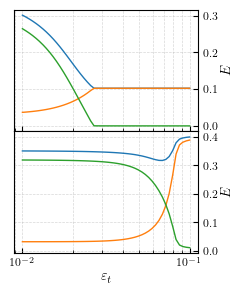

<Figure size 640x480 with 0 Axes>

In [25]:

IMG_DIRECTORY = "./Assets/optimal_defense"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
            bbox_inches="tight",
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

multiplier = 1.25
width = multiplier * 458.63788

plt.style.use("../latex_ready.mplstyle")

tuple_size = set_size(width, fraction=1.0)
# tuple_size = (2*8.5/4,2.7/2)
tuple_size = (2.3,4.2)

# multiplier = 0.9
# second_multiplier = 0.7

fig, axs = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    sharey=False,
    figsize=(tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0.0},
)

from matplotlib.pyplot import Line2D

# ICML adjustments
fig.subplots_adjust(left=0.1)
fig.subplots_adjust(bottom=0.22)
fig.subplots_adjust(top=0.8)
fig.subplots_adjust(right=0.9)

axs = axs.flatten()


linestyles = ["solid", "dashed", "dashdot", "dotted"]

for idx, (name, eps_dict) in enumerate(dm_dict.items()):

    axs[idx].grid(which="both", axis="both", alpha=0.5)

    eps_dict = eps_dict[0.05]

    # if idx > 0:
    #     continue

    epsilons = eps_dict["epsilons"]

    adversarial_error = eps_dict["adversarial_error"]
    generalization_error = eps_dict["generalization_error"]
    boundary_error = eps_dict["boundary_error"]
    class_preserving = eps_dict["class_preserving"]

    adversarial_error_erm = eps_dict["adversarial_error_erm"]
    generalization_error_erm = eps_dict["generalization_error_erm"]
    boundary_error_erm = eps_dict["boundary_error_erm"]
    class_preserving_erm = eps_dict["class_preserving_erm"]

    adversarial_error_erm_std = eps_dict["adversarial_error_erm_std"]
    generalization_error_erm_std = eps_dict["generalization_error_erm_std"]
    boundary_error_erm_std = eps_dict["boundary_error_erm_std"]
    class_preserving_erm_std = eps_dict["class_preserving_erm_std"]

    axs[idx].plot(epsilons, adversarial_error,  color="C0")
    axs[idx].plot(epsilons, generalization_error, color="C1")
    axs[idx].plot(epsilons, boundary_error,  color="C2")
    # axs[idx].plot(epsilons, class_preserving,  color="C3", linestyle=linestyles[idx])

    # axs[idx].legend(title=name, loc="upper right")
    # axs[idx].legend(title=name, loc="lower center")
    # axs[idx].legend(title=name)

    # axs[idx].errorbar(
    #     epsilons,
    #     adversarial_error_erm,        
    #     yerr=adversarial_error_erm_std,
    #     fmt=".",
    #     markersize=1,
    #     color="C0"
    # )
    # axs[idx].errorbar(
    #     epsilons,
    #     generalization_error_erm, 
    #     yerr=generalization_error_erm_std,
    #     fmt=".",
    #     markersize=1,
    #     color="C1"
    # )
    # axs[idx].errorbar(
    #     epsilons,
    #     boundary_error_erm,        
    #     yerr=boundary_error_erm_std,
    #     fmt=".",
    #     markersize=1,
    #     color="C2"
    # )


    # axs[idx].errorbar(
    #     epsilons,
    #     adversarial_error_erm,
    #     yerr=adversarial_error_erm_std,
        
    #     markersize=1,
    #     linestyle=linestyles[idx],
    #     color="C0"
    # )
    # axs[idx].errorbar(
    #     epsilons,
    #     generalization_error_erm,
    #     yerr=generalization_error_erm_std,
    #     markersize=1,
    #     linestyle=linestyles[idx],
    #     color="C1"
    # )
    # axs[idx].errorbar(
    #     epsilons,
    #     boundary_error_erm,
    #     yerr=boundary_error_erm_std,
        
    #     markersize=1,
    #     linestyle=linestyles[idx],
    #     color="C2"
    # )
    # axs[idx].errorbar(
    #     epsilons,
    #     class_preserving_erm,
    #     yerr=class_preserving_erm_std,
    #     fmt="*",
    #     markersize=1,
    #     color="C3"
    # )

axs[0].set_xscale("log")
# axs[0].set_yscale("log")
axs[0].set_ylabel(r"$E$", labelpad=2.0)
axs[0].set_xlabel(r"$\varepsilon_t$", labelpad=2.0)
# axs[0].grid(which="both", axis="both", alpha=0.5)
axs[0].tick_params(axis='both', which='major', direction='in')
axs[0].tick_params(axis='both', which='minor', direction='in')
# axs[0].legend(title="Orthogonal")


axs[1].set_xscale("log")
# axs[1].set_yscale("log")
axs[1].set_ylabel(r"$E$", labelpad=2.0)
axs[1].set_xlabel(r"$\varepsilon_t$", labelpad=2.0)

axs[1].tick_params(axis='both', which='major', direction='in')
axs[1].tick_params(axis='both', which='minor', direction='in')
# axs[1].legend(title="Perturbed", loc="lower left")

# move ylabel and yticklabels to the right
# axs[1].legend(title="Teacher")
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

axs[0].yaxis.set_label_position("right")
axs[0].yaxis.tick_right()

error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))

# fig.legend(handles=error_legend, loc="upper center", ncol=3)

save = True
if save:
    save_plot(
        fig,
        "optimal_defense",
    )

plt.show()

plt.tight_layout()